In [1]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import DNAAlphabet
from dna_features_viewer import BiopythonTranslator, CircularGraphicRecord

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def join_sequences(sequences, new_name=None):
    """
    Joins sequences together in the order specified.
    
    Parameters:
    ===========
    - sequences : (iterable) containing BioPython SeqRecord objects. 
    - new_name : (optional) a string to be used as the new SeqRecord object's 'id' and 'name'.
    """
    
    new_sequence = Seq('', alphabet=DNAAlphabet())
    for s in sequences:
        new_sequence += s.seq
    
    new_seqrecord = SeqRecord(new_sequence)
    
    if new_name:
        new_seqrecord.id = new_name
        new_seqrecord.name = new_name
        
    return new_seqrecord

vic = SeqIO.read('Vic-pb2-forward.ape', 'gb')
wsn = SeqIO.read('WSN-PB2.ape', 'gb')
bm8 = SeqIO.read('8BM3740-PB2.ape', 'gb')
backbone = SeqIO.read('pCI-forward.ape', 'gb')

In [3]:
# Make the newly concatenated SeqRecord objects.
new_seqs = []

pb2s = {'vic': vic, 'wsn': wsn, 'bm8': bm8}

for name, pb2 in pb2s.items():
    s = join_sequences([pb2, backbone], new_name='{0}_in_pCI'.format(name))
    # new_seqs.append(s)
    SeqIO.write(s, '{0}_in_pCI.ape'.format(name), 'gb')

In [4]:
new_seqs

[]

In [7]:
files = ['{0}_in_pCI.ape'.format(name) for name in pb2s.keys()]

seqs = [SeqIO.read(f, 'gb') for f in files]
seqs

[SeqRecord(seq=Seq('ATGGAAAGAATAAAAGAACTAAGAGACCTAATGTCACAGTCCCGCACCCGCGAG...GAG', IUPACAmbiguousDNA()), id='bm8_in_pCI', name='bm8_in_pCI', description='.', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGAAAGAATAAAAGAACTAAGGAATCTAATGTCGCAGTCTCGCACTCGCGAG...GAG', IUPACAmbiguousDNA()), id='wsn_in_pCI', name='wsn_in_pCI', description='.', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGAAAGAATAAAAGAACTACGGAATCTGATGTCGCAGTCTCGCACTCGCGAG...GAG', IUPACAmbiguousDNA()), id='vic_in_pCI', name='vic_in_pCI', description='.', dbxrefs=[])]

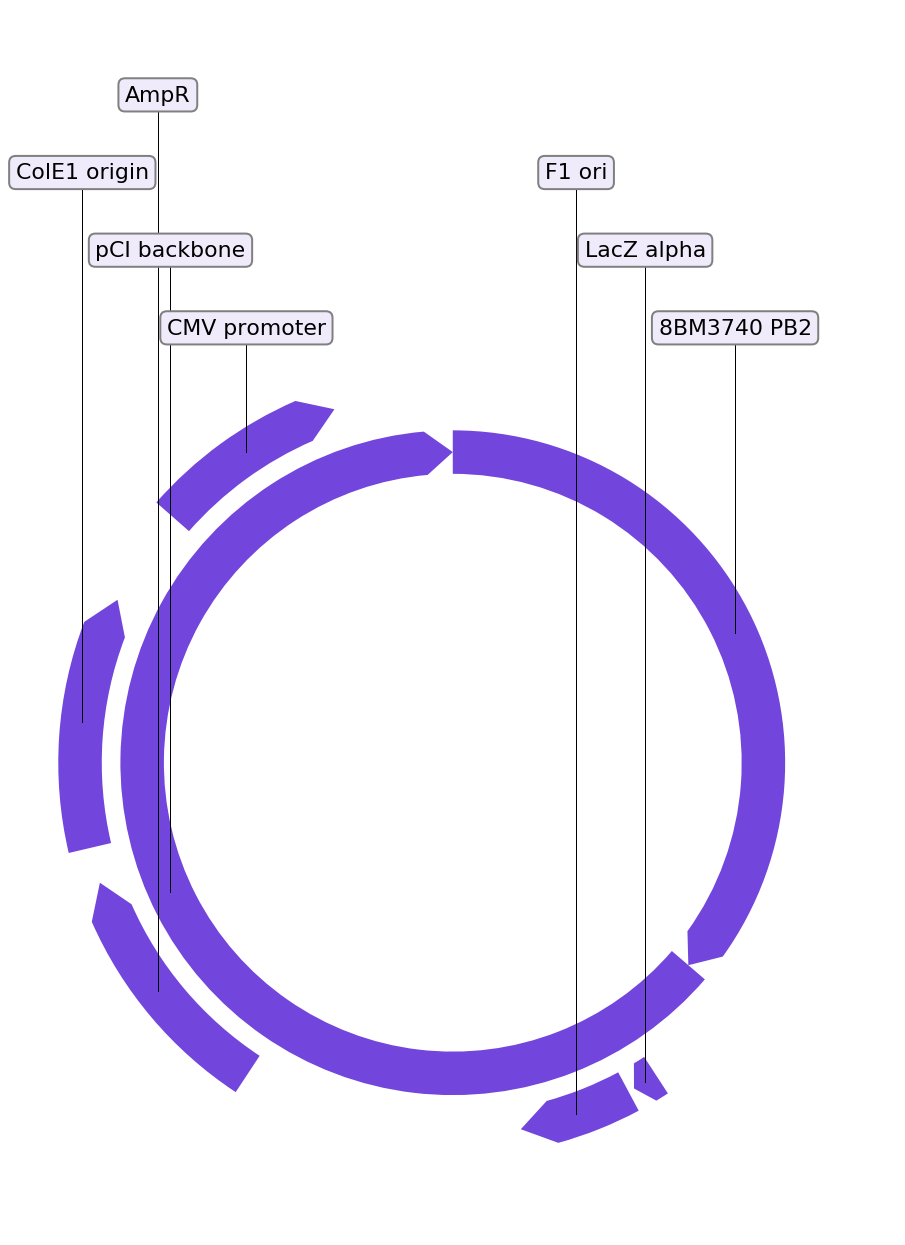

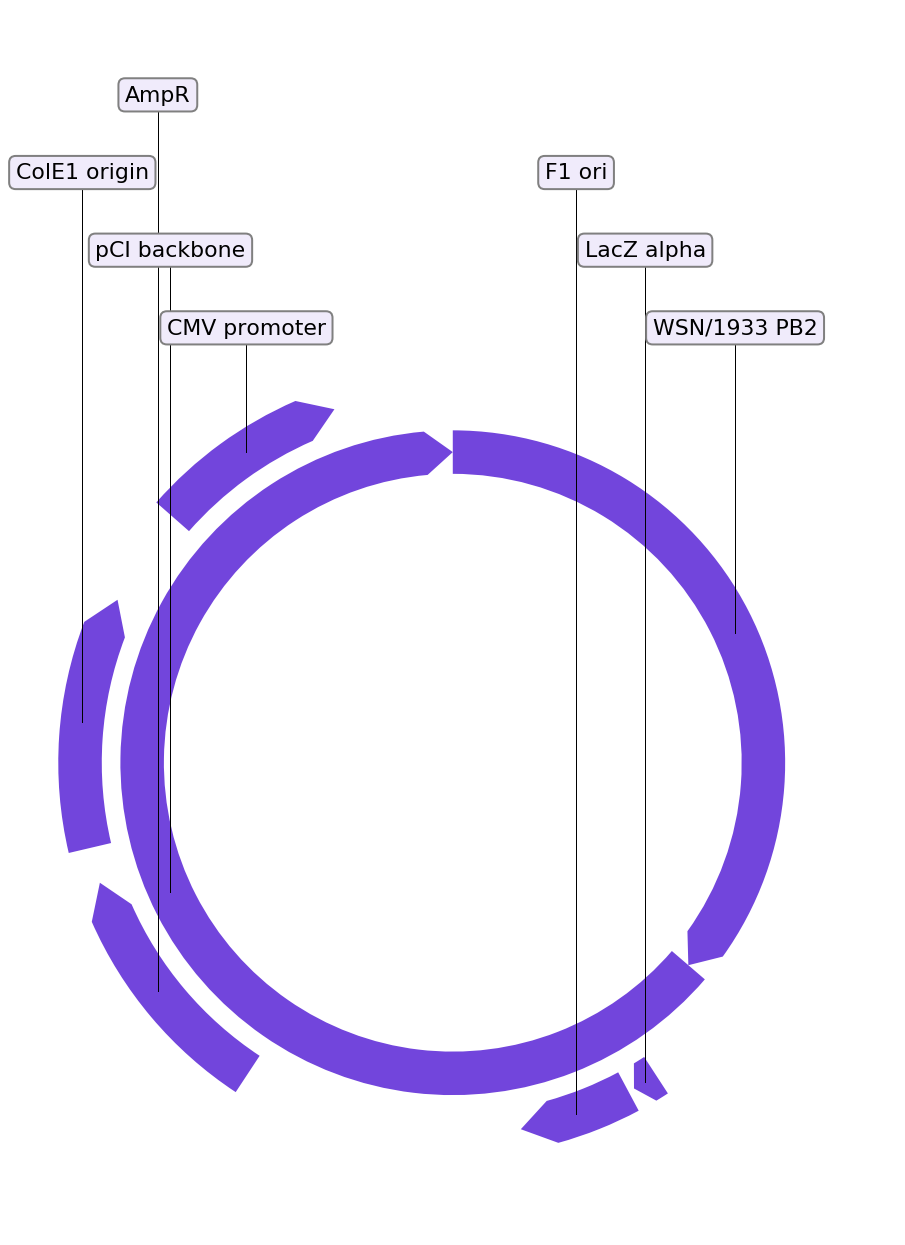

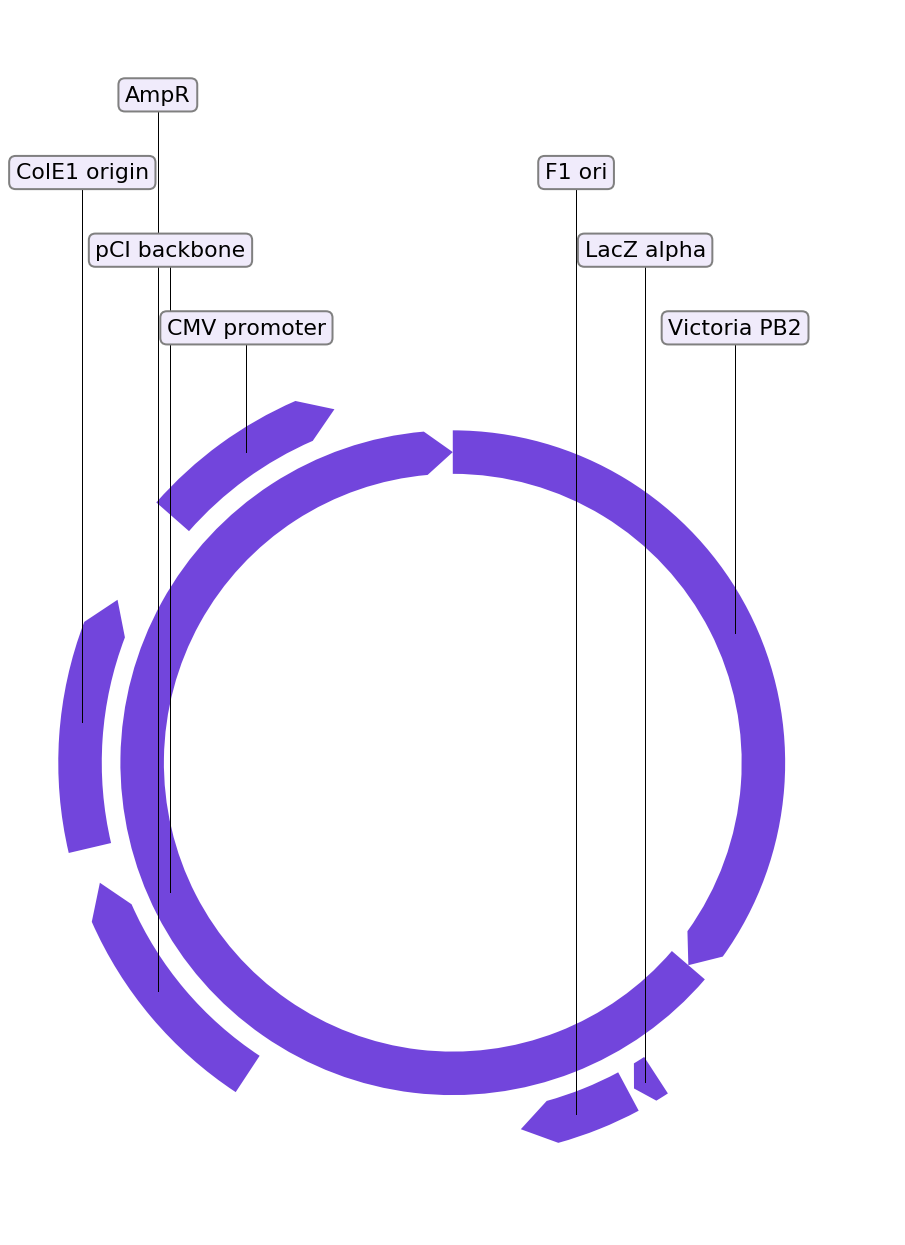

In [12]:
for seq in seqs:
    graphic_record = BiopythonTranslator().translate_record(seq, grecord_class=CircularGraphicRecord)
    graphic_record.plot()
    plt.savefig('{0}.pdf'.format(seq.id))